# Fourier Transform

This notebook will explain what a fourier transform is and show how it can be implemented in a real world application using a call of a stag.

### What are Fourier Transforms?
Fourier transform is a technique that transforms a time based sound into another variables as a base.
When we plot what the `wav` file looks like before the transformation, we see that the plot has an x axis for time and it shows the ""something"" over time.

After the fourier transform, we will see a visualisation with intensity on the y axis and the frequency in the x acis.


### What are fourier transforms used for?
The forier transforms are very useful in real world applications 

### What is this example about?
this example is to see which frequencies are in a stags call. In this notebook we will:
- import all relevant packages
- read in the sound information and clean it
- define useful functions to use later on
- run the fourier transform for all frequencies
- visualise the transformed data.



In [1]:
# Import required packages
from pathlib import Path

import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fft import fft, fftfreq
import numpy as np 

%matplotlib inline

In [ ]:
# useful functions

def create_vis(
        y_array:np.array,
        x_array:np.array=None,
        title:str=None,
        x_title:str=None,
        y_title:str=None,
    ):
    """Create a visualisation."""
    fig, ax = plt.subplots(figsize=(10, 4))
    if x_array:
        ax.plot(x_array, y_array)
    else:
        ax.plot(y_array)

    # titles and axes constructing
    if x_title:
        ax.set_xlabel(x_title)
    if y_title:
        ax.set_ylabel(y_title)
    if title:
        fig.suptitle(t=title, x=0.01, ha="left", fontsize="xx-large")

    return fig


def calculate_fourier_transform(
    data:np.array,
    frequency:int,
    n_arr:np.array,
    dp:int,
):
    """Compute fourier transform equation for a single frequency."""
    # complex number calculation
    equation_inside_trig_func = (-2 * np.pi * frequency * n_arr / dp )
    real_component = np.mean(data * np.cos(equation_inside_trig_func) )
    imaginary_component = np.mean(data * -np.sin(equation_inside_trig_func) )

    # combining real and imaginary parts
    complex_output = complex(real_component, imaginary_component) 
    return np.abs(complex_output)


### Feeding in data
We are now going to read and feed in the sound data

In the `calculate_fourier_transform` function that is defined above, you can see the discrete fourier transform function. 
In mathematical notation, we write it like

$ \frac{1/N} \sum{}{} 

/tmp/ipykernel_5710/394530735.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sound_info["rate"], sound_info["data"] = wav.read(stag_sound_filename)


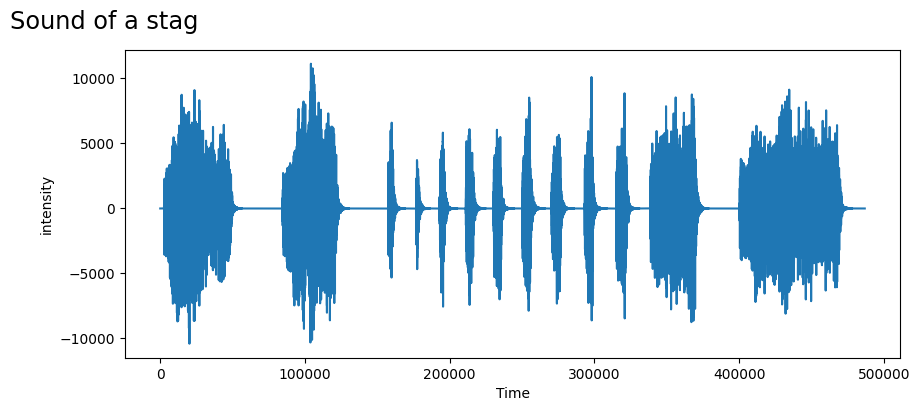

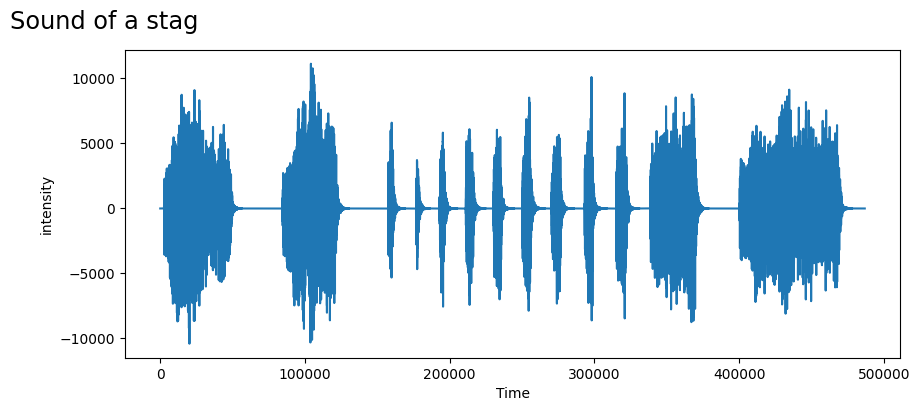

In [15]:
# Get sound information and the required data descriptors
sound_info = {}

# Initial look into the stag sound
stag_sound_filename = Path.cwd() / 'Red_stag_roar-Juan_Carlos_-2004708707.wav'
sound_info["rate"], sound_info["data"] = wav.read(stag_sound_filename)
sound_info["duration"] = 11

# clean data
sound_info["data_1d"] = np.delete(sound_info["data"], 0, 1)
sound_info["nonzero_data"] = sound_info["data_1d"][ sound_info["data_1d"] != 0]

# required variables
sound_info["num_of_nonzero_data_points"] = len(sound_info["nonzero_data"])
sound_info["frequencies"] = np.arange(20000)


create_vis(
    y_array=sound_info["data_1d"],
    title="Sound of a stag",
    x_title="Time",
    y_title="intensity",
)

In [18]:
# create a list of intensity for each frequency
# frequencies_transformed = []
# for freq in sound_info["frequencies"]:
#     transformed_output = calculate_fourier_transform(
#         data=sound_info["nonzero-data"],
#         frequency=freq,
#         n_arr=np.arange(sound_info["num_of_nonzero_data_points"]),
#         dp=sound_info["num_of_nonzero_data_points"],
#     )
#     frequencies_transformed.append(transformed_output)

# list of transformed data points for each frequency
frequencies_transformed = [
    calculate_fourier_transform(
        data=sound_info["nonzero_data"],
        frequency=freq,
        n_arr=np.arange(sound_info["num_of_nonzero_data_points"]),
        dp=sound_info["num_of_nonzero_data_points"],
    )
    for freq in sound_info["frequencies"]
]

In [19]:
#Analysis of the the frequency intensities
print(
    f"The max term in the frequency power is{np.max(frequencies_transformed)} and "
    f"the min is {np.min(frequencies_transformed)}"
)

The max term in the frequency power is65.58619845884975 and the min is 0.007751440491984193


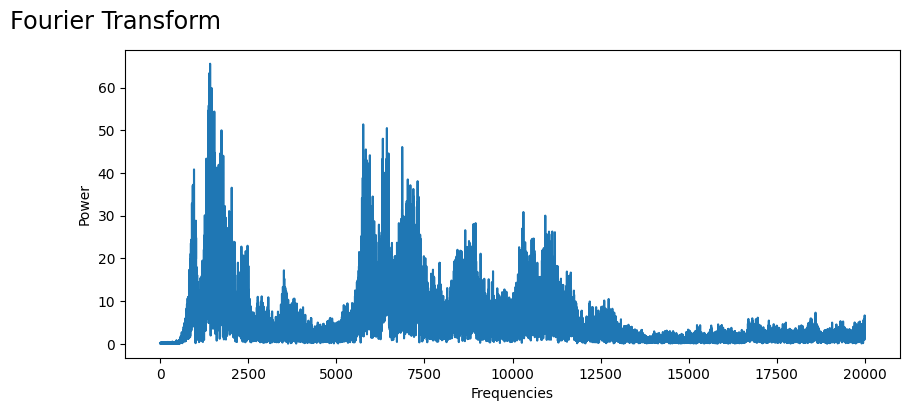

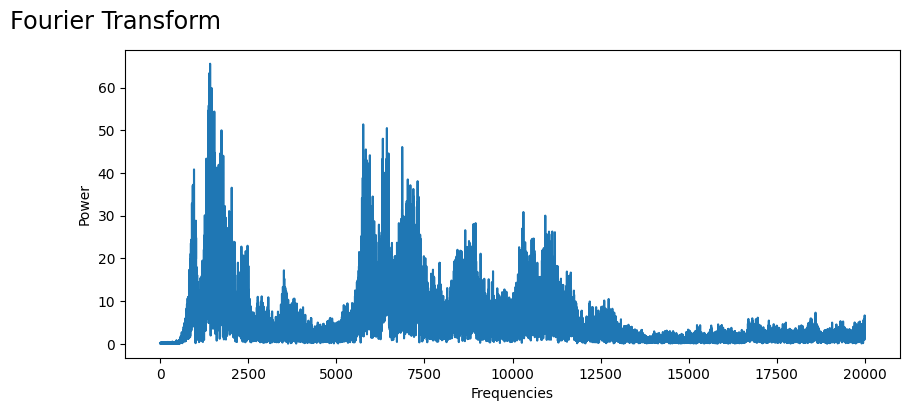

In [22]:
# Visualise fourier transform transform output
create_vis(
    y_array=frequencies_transformed,
    title="Fourier Transform",
    x_title="Frequencies",
    y_title="Power",
)

In [8]:
exponential_arr = np.exp(np.array([0+1j]).imag * -2 * np.pi * 60 / N)
equation_component = (nonzerodata * exponential_arr)
summed = np.sum(equation_component)
summed / N * 2

np.float64(0.13114169222615205)

ValueError: x and y must have same first dimension, but have shapes (485100,) and (486780,)

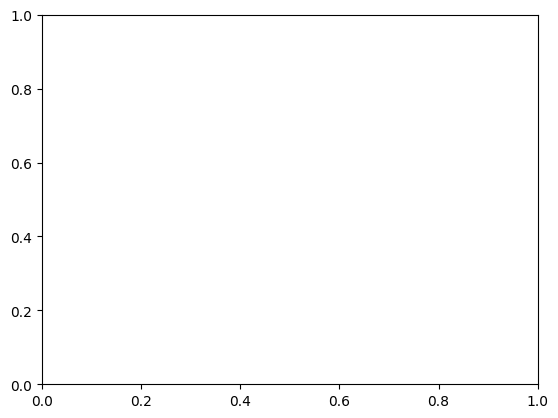

In [26]:
# Number of samples in normalized_tone
N = sound_info["rate"] * sound_info["duration"]

yf = fft(sound_info["data_1d"].flatten())
xf = fftfreq(N, 1 / sound_info["rate"])

plt.plot(xf, np.abs(yf))
plt.show()